##In this notebook we are going to


1.   Explore electric vehicle battery dataset to understand the effect of various factors on battery efficeny.
2.  Visualise data set.
3. Create different models to predict battery efficiency
4. Conclude the exploration by comparing differnt models - linear regression, SVR, Ridge regression, Decision tree.



In [104]:
#Get EV data from Kaggle
# import kaggle
import pandas as pd

# kaggle.api.dataset_download_files('ziya07/ev-battery-charging-data', path='.', unzip=True)
df = pd.read_csv('/content/ev_battery_charging_data.csv')
df

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Charging Mode,Efficiency (%),Battery Type,Charging Cycles,EV Model,Optimal Charging Duration Class
0,43.708611,3.629593,33.553512,33.454060,26.439918,59.363552,8.805096,Fast,98.238981,Li-ion,112,Model B,1
1,95.564288,3.879331,32.228092,35.933628,31.108647,67.343566,12.186860,Fast,97.562628,LiFePO4,398,Model A,1
2,75.879455,4.111062,91.562912,25.009358,30.203219,105.454739,13.832336,Slow,97.233533,LiFePO4,175,Model A,2
3,63.879264,4.012557,32.459158,32.497482,18.077998,54.000439,9.318874,Fast,98.136225,LiFePO4,150,Model B,1
4,24.041678,4.064593,34.475475,31.434920,17.984989,106.964968,11.687577,Fast,97.662485,Li-ion,886,Model C,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,18.242387,3.959869,87.876618,28.842141,32.947946,88.443536,9.724521,Normal,98.055096,LiFePO4,236,Model C,2
996,92.558222,4.169630,24.154589,26.688024,17.387620,70.322041,11.822482,Normal,97.635504,LiFePO4,957,Model A,1
997,22.313677,3.548271,37.880907,27.891446,21.556857,96.514885,10.553163,Fast,97.889367,LiFePO4,997,Model C,2
998,95.521362,3.539938,36.104098,30.598812,31.314908,68.529063,12.016764,Normal,97.596647,LiFePO4,435,Model B,1


In [105]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

Missing values per column:
SOC (%)                            0
Voltage (V)                        0
Current (A)                        0
Battery Temp (°C)                  0
Ambient Temp (°C)                  0
Charging Duration (min)            0
Degradation Rate (%)               0
Charging Mode                      0
Efficiency (%)                     0
Battery Type                       0
Charging Cycles                    0
EV Model                           0
Optimal Charging Duration Class    0
dtype: int64


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   SOC (%)                          1000 non-null   float64
 1   Voltage (V)                      1000 non-null   float64
 2   Current (A)                      1000 non-null   float64
 3   Battery Temp (°C)                1000 non-null   float64
 4   Ambient Temp (°C)                1000 non-null   float64
 5   Charging Duration (min)          1000 non-null   float64
 6   Degradation Rate (%)             1000 non-null   float64
 7   Charging Mode                    1000 non-null   object 
 8   Efficiency (%)                   1000 non-null   float64
 9   Battery Type                     1000 non-null   object 
 10  Charging Cycles                  1000 non-null   int64  
 11  EV Model                         1000 non-null   object 
 12  Optimal Charging Dura

In [107]:
#DESCRIPTIVE STATISTICS
import pandas as pd
numerical_cols = df.select_dtypes(include=['number'])
descriptive_stats = numerical_cols.describe()
display(descriptive_stats)

,SOC (%),Voltage (V),Current (A),Battery Temp (°C),Ambient Temp (°C),Charging Duration (min),Degradation Rate (%),Efficiency (%),Charging Cycles,Optimal Charging Duration Class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,54.123090,3.854912,55.216515,29.807501,24.882106,69.846449,10.017067,97.996587,556.560000,1.194000
std,26.292363,0.204533,26.160678,5.729787,5.736199,28.919481,2.697141,0.539428,263.763052,0.747611
min,10.416882,3.502253,10.001047,20.013068,15.000614,20.618382,4.102433,96.791442,101.000000,0.000000
25%,31.237594,3.668752,33.521588,24.838015,19.899480,44.938000,8.010985,97.585509,317.750000,1.000000
50%,54.712664,3.863114,55.055253,29.685586,24.891962,69.040282,10.027301,97.994540,571.000000,1.000000
75%,76.988763,4.032326,78.319317,34.750816,29.799869,93.985178,12.072456,98.397803,786.000000,2.000000
max,99.974591,4.199590,99.803877,39.991154,34.954988,119.935030,16.042788,99.179513,999.000000,2.000000


## Data visualization


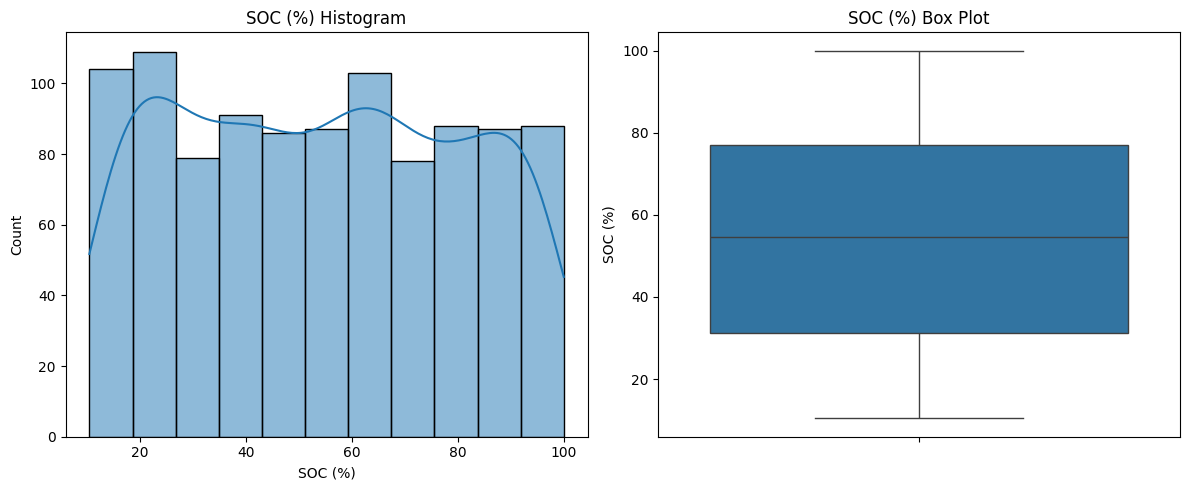

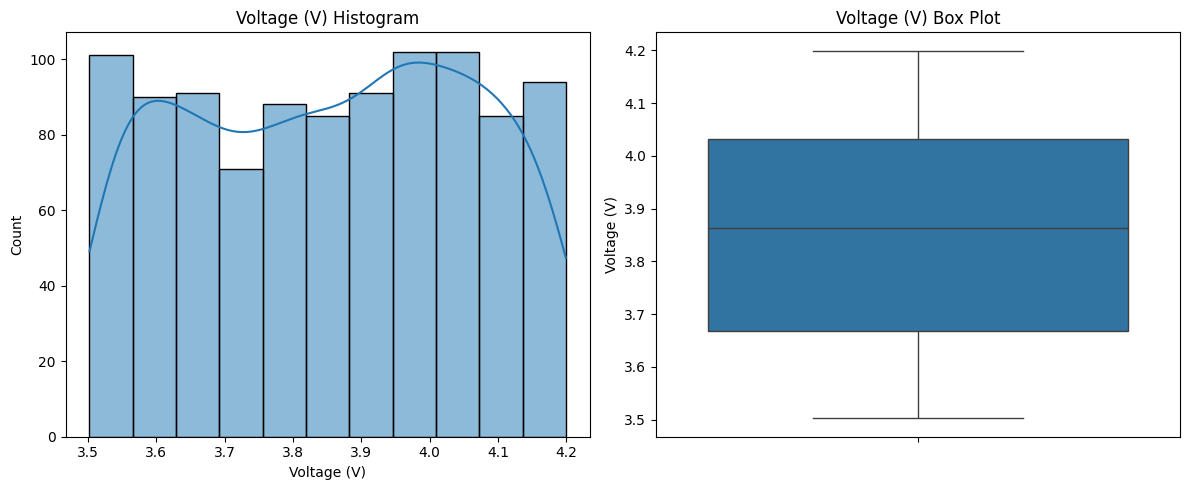

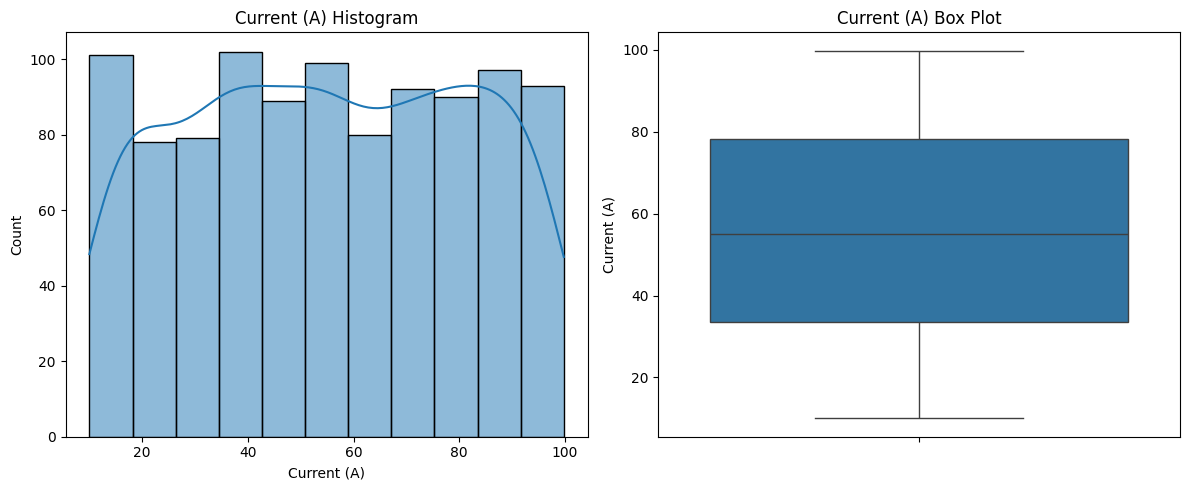

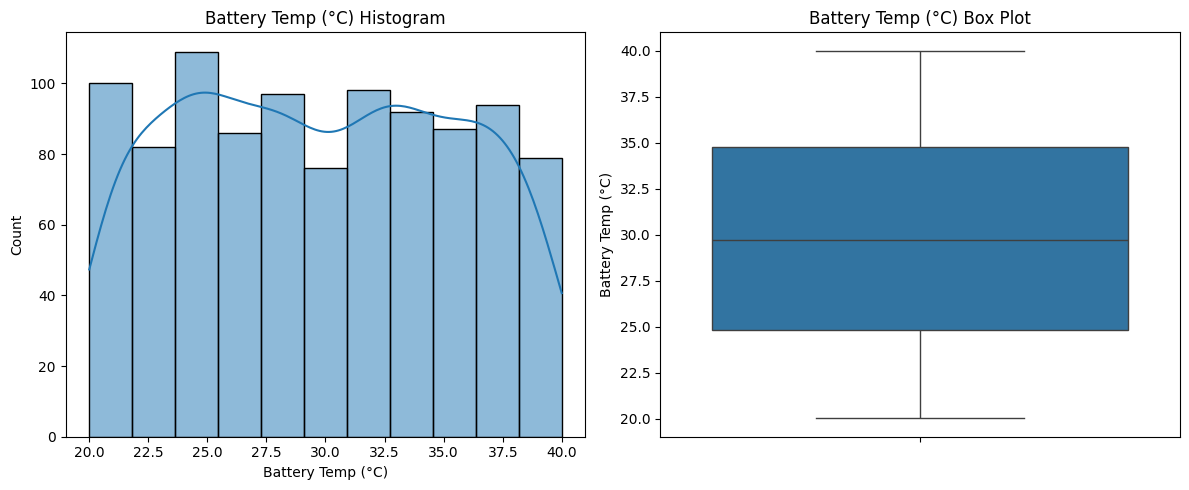

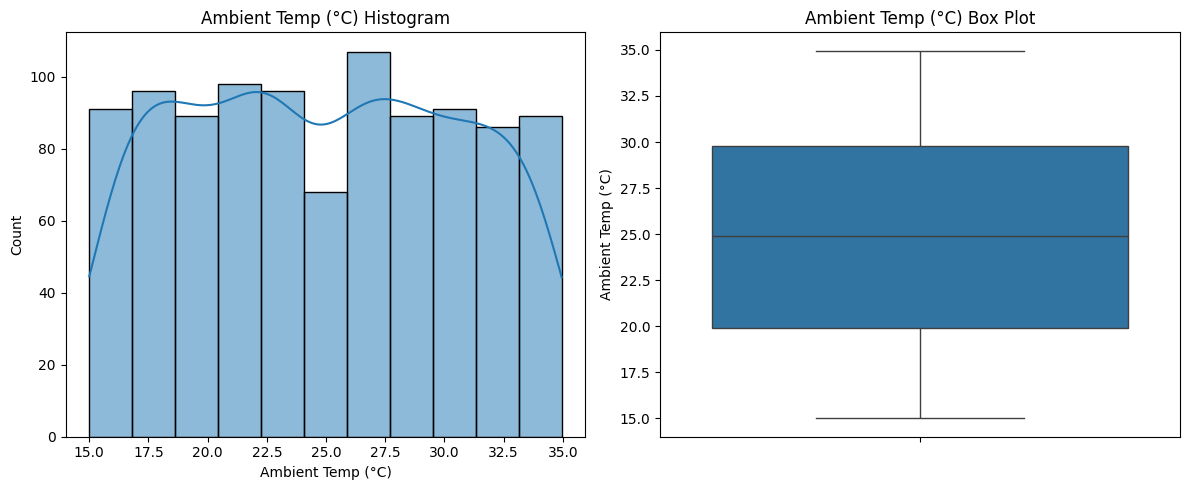

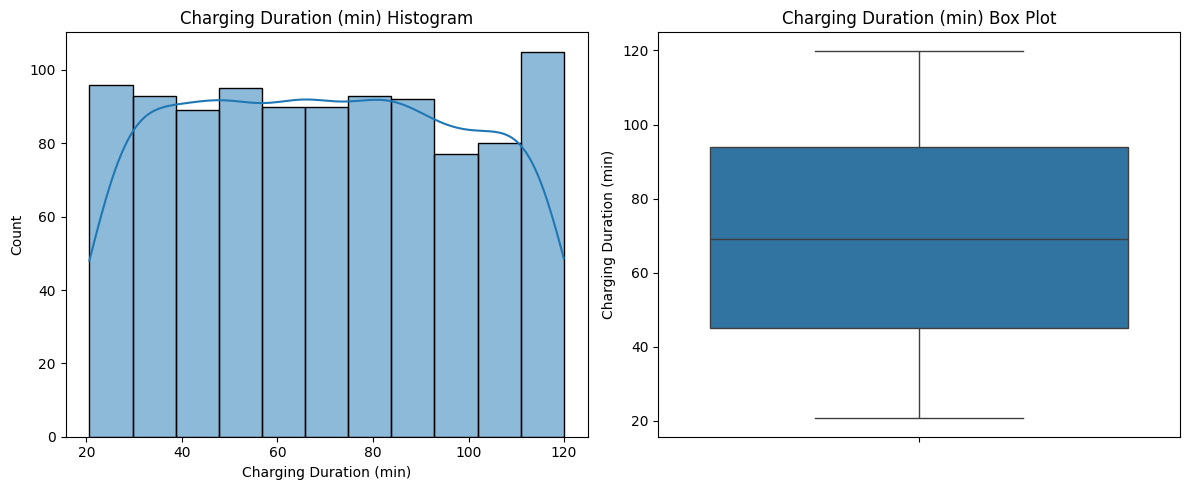

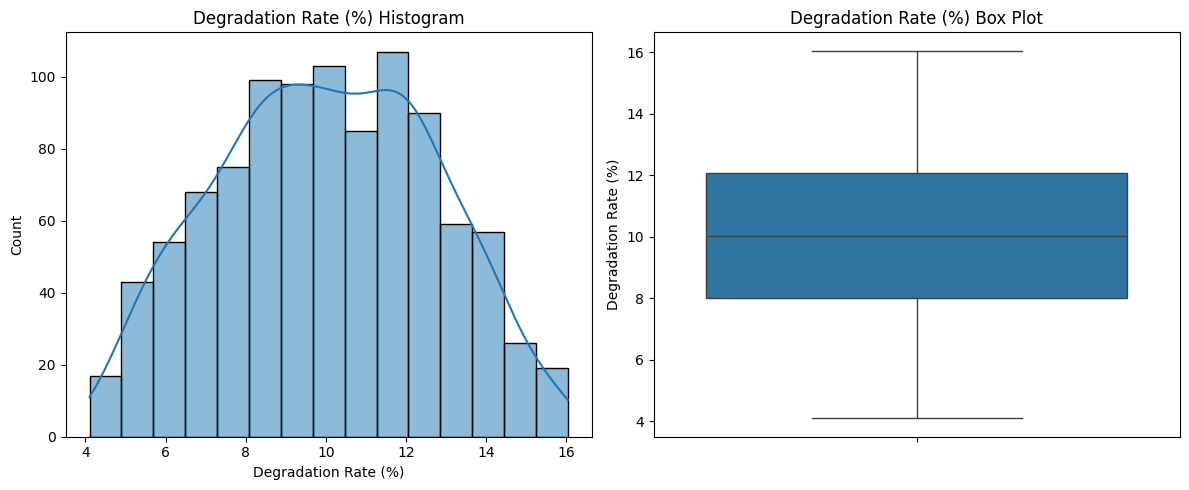

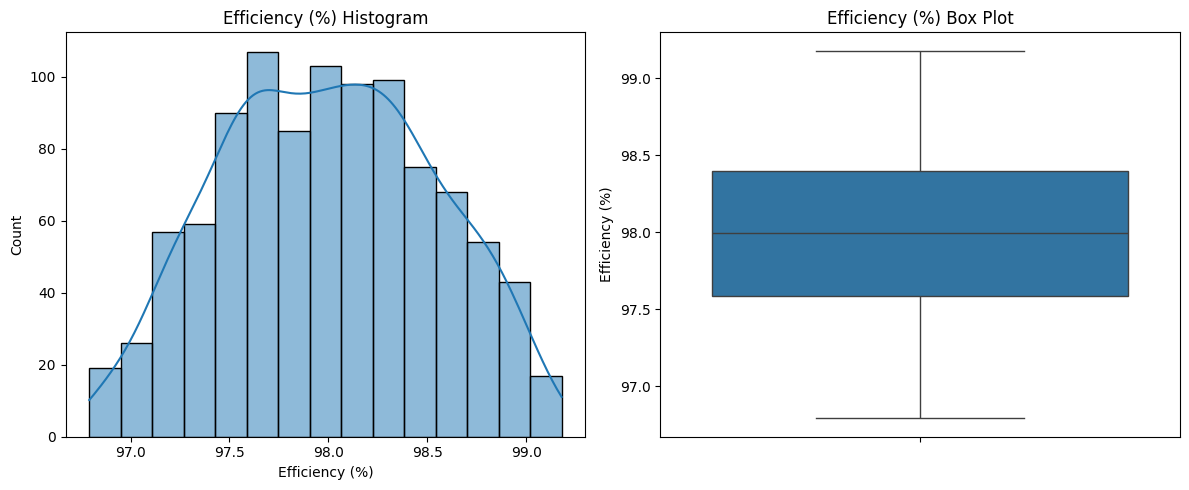

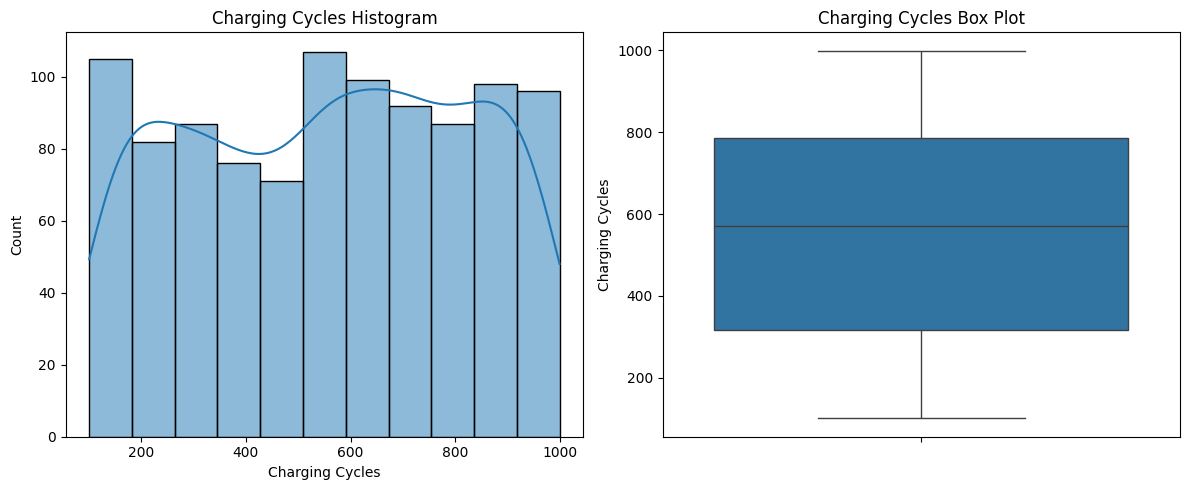

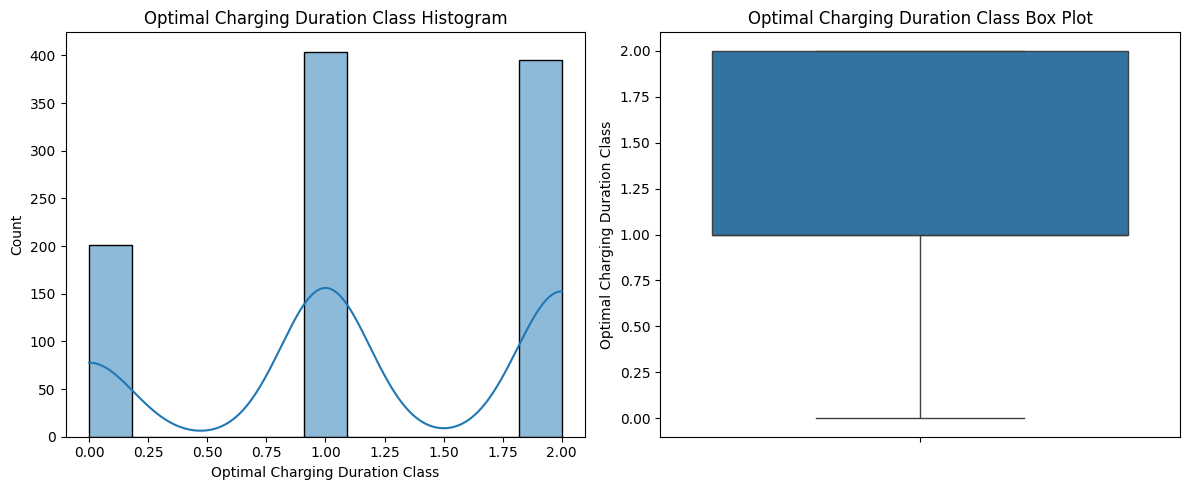

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_cols.columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=numerical_cols, x=col, kde=True)
    plt.title(f'{col} Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(data=numerical_cols, y=col)
    plt.title(f'{col} Box Plot')

    plt.tight_layout()
    plt.show()

## Data visualization

###Bar charts for categorical columns to visualize the distribution of categories.


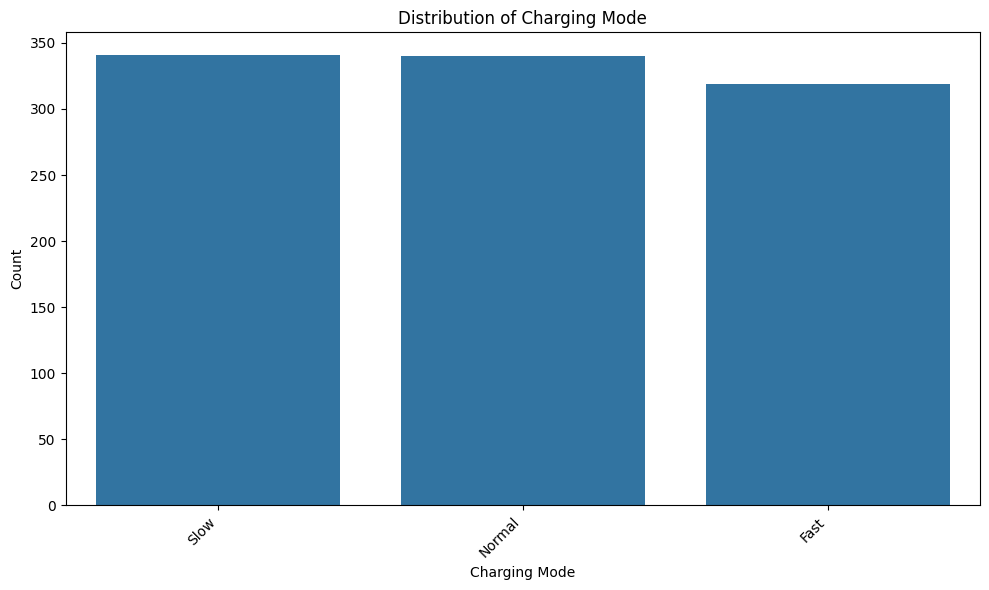

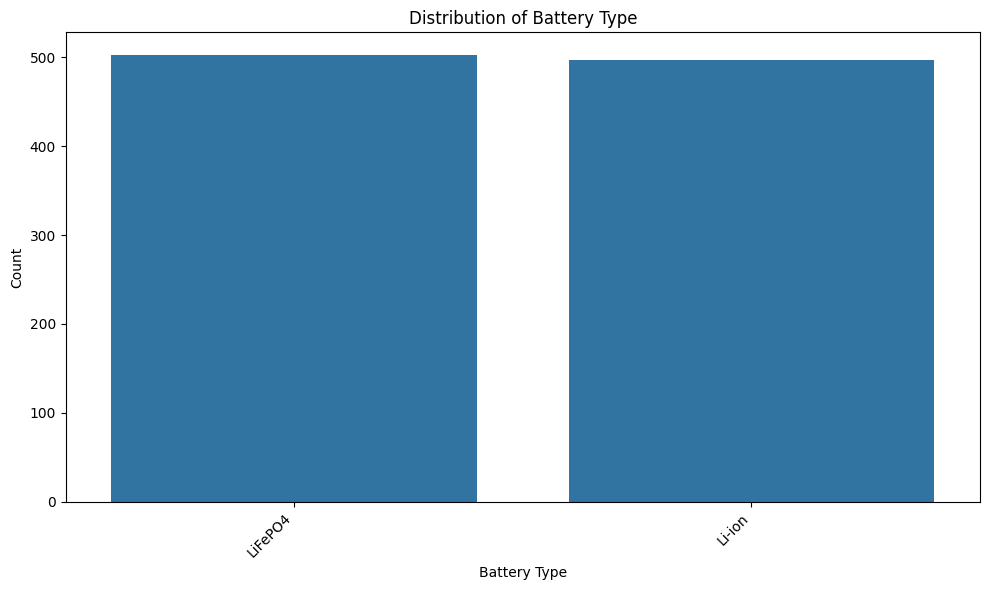

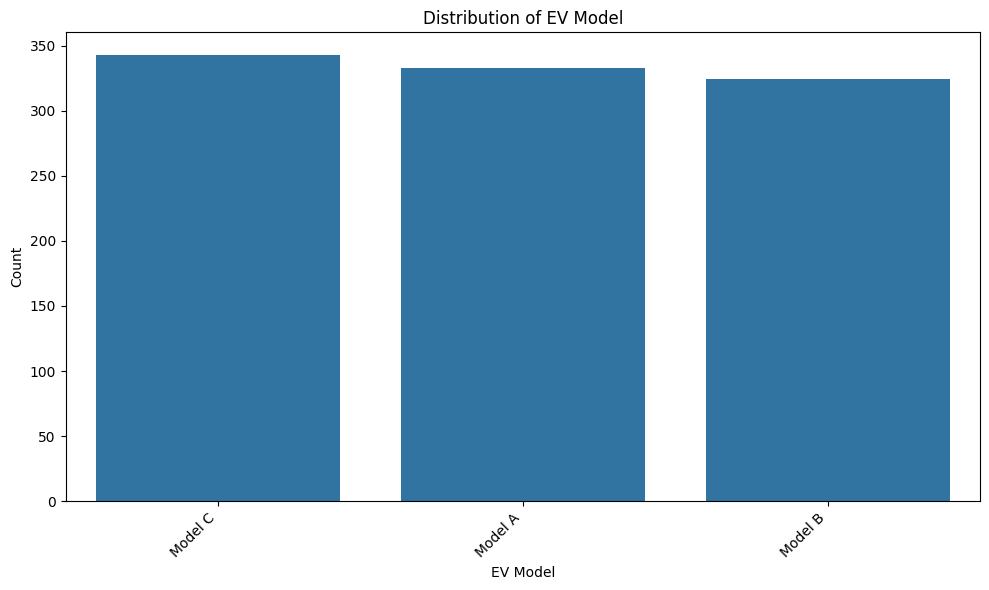

In [109]:
categorical_cols = df.select_dtypes(include=['object', 'category'])

for col in categorical_cols.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

### Correlation matrix and heatmap for numerical columns, focusing on the correlation with Efficiency (%).


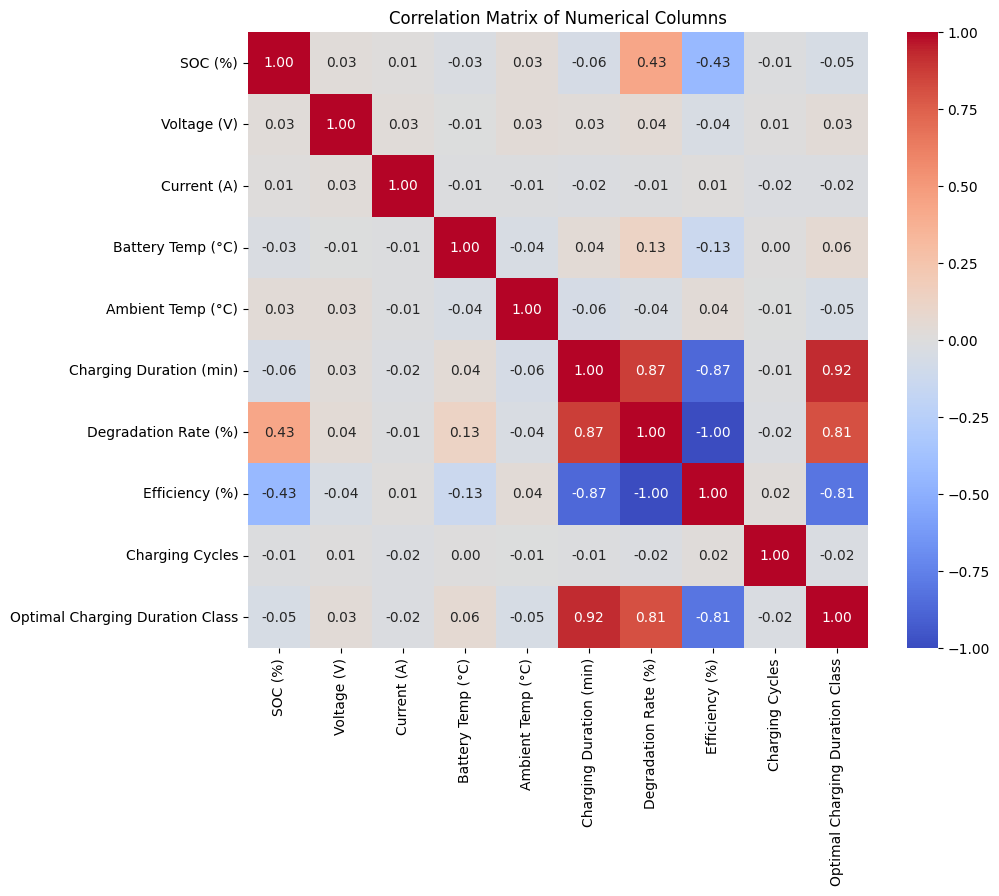

/tmp/ipython-input-3683698721.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=efficiency_correlation.index, y=efficiency_correlation.values, palette='viridis')


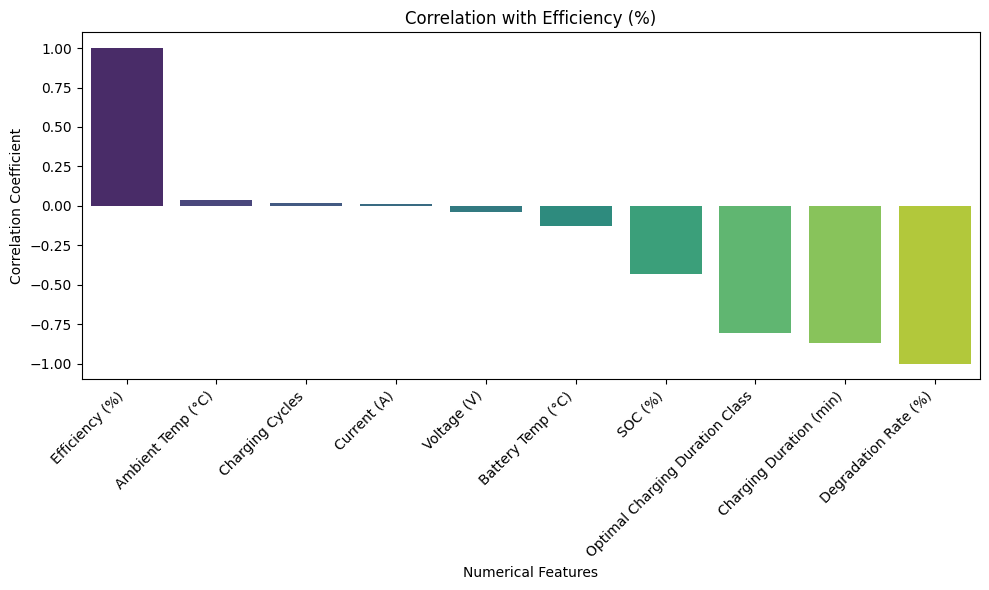

In [110]:
correlation_matrix = numerical_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

efficiency_correlation = correlation_matrix['Efficiency (%)'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=efficiency_correlation.index, y=efficiency_correlation.values, palette='viridis')
plt.title('Correlation with Efficiency (%)')
plt.xlabel('Numerical Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Model 1 - Linear regression

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd



# data has some non numnerical columns
# apply one hot encoding for data preprocessing


# Using efficiency as label and other columns
X = df.drop('Efficiency (%)', axis=1)
y = df['Efficiency (%)']

# Splitting dataset into train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Categorical columns
categorical_features = ['Charging Mode', 'Battery Type', 'EV Model']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Clean up using one-hot encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough' # other numerical columns
)

# Fit , transform  training data
X_train_encoded = preprocessor.fit_transform(X_train)

encoded_feature_names = preprocessor.get_feature_names_out(X_train.columns)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)

# Transform testing data
X_test_encoded = preprocessor.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

In [112]:
# now using the data to create a linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression()

## Evaluate model 1 - metrics (e.g., Mean Squared Error, R-squared).


In [113]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

y_pred = model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 2.3728936029048036e-28
R-squared: 1.0


### Testing playground - cell to call model using new data

In [114]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# new sample to predict efficieny
new_data = {
    'SOC (%)': [50.0],
    'Voltage (V)': [3.8],
    'Current (A)': [60.0],
    'Battery Temp (°C)': [30.0],
    'Ambient Temp (°C)': [25.0],
    'Charging Duration (min)': [70.0],
    'Degradation Rate (%)': [9.0],
    'Charging Cycles': [400],
    'Optimal Charging Duration Class': [1],
    'Charging Mode': ['Fast'],
    'Battery Type': ['LiFePO4'],
    'EV Model': ['Model B']
}

new_data_df = pd.DataFrame(new_data)

# Use preprocessor to transform new  test sample
new_data_encoded = preprocessor.transform(new_data_df)

# Transformed data --> DataFrame with correct column names
# Get the feature names from  preprocessor
encoded_feature_names = preprocessor.get_feature_names_out()
new_data_encoded = pd.DataFrame(new_data_encoded, columns=encoded_feature_names, index=new_data_df.index)


# Make predictions
predicted_efficiency = model.predict(new_data_encoded)
print(f"Predicted Efficiency (%): {predicted_efficiency[0]}")

Predicted Efficiency (%): 98.03530057644798


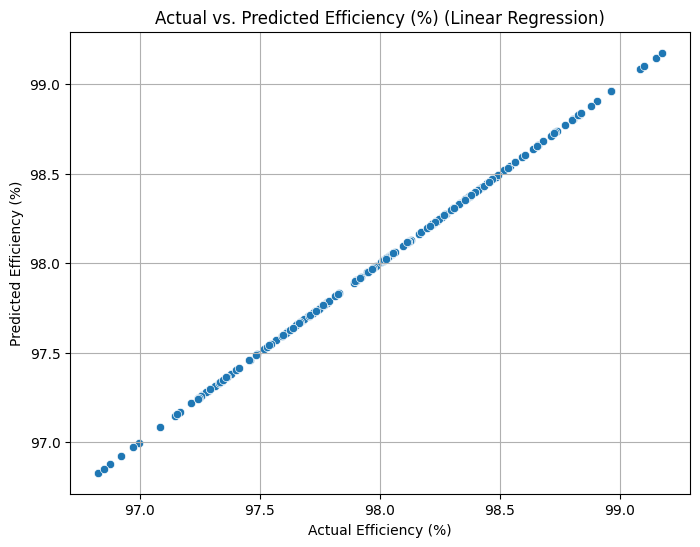

In [115]:
# visualise the prefdicted and acutal efficiency for linear regression model

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Efficiency (%)")
plt.ylabel("Predicted Efficiency (%)")
plt.title("Actual vs. Predicted Efficiency (%) (Linear Regression)")
plt.grid(True)
plt.show()

## Model2 - SVR - Support Vector Regression

In [116]:
from sklearn.svm import SVR

# Initialize and train the SVR model
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_encoded, y_train)

# Predictions on test dataset
y_pred_svr = svr_model.predict(X_test_encoded)

# SVR model eval
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Mean Squared Error: {mse_svr}")
print(f"SVR R-squared: {r2_svr}")

SVR Mean Squared Error: 0.0018136688728335208
SVR R-squared: 0.9930106397156399


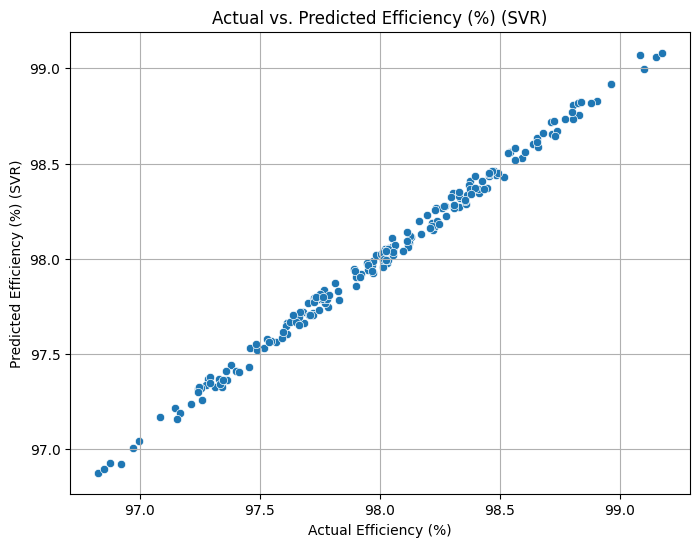

In [117]:
# Visualize Actual vs. Predicted values for SVR
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_svr)
plt.xlabel("Actual Efficiency (%)")
plt.ylabel("Predicted Efficiency (%) (SVR)")
plt.title("Actual vs. Predicted Efficiency (%) (SVR)")
plt.grid(True)
plt.show()

## Model3 - Ridge regression

In [118]:
from sklearn.linear_model import Ridge

# Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_encoded, y_train)

# Predictions on test dataset
y_pred_ridge = ridge_model.predict(X_test_encoded)

# Ridge Regression model eval
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression R-squared: {r2_ridge}")

Ridge Regression Mean Squared Error: 8.697226171805048e-12
Ridge Regression R-squared: 0.9999999999664834


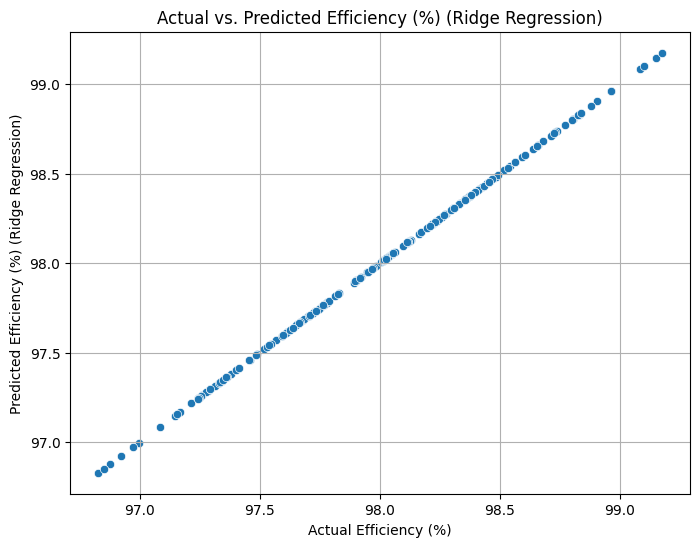

In [119]:

# visualize ridge regression model

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Actual vs. Predicted values for Ridge Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge)
plt.xlabel("Actual Efficiency (%)")
plt.ylabel("Predicted Efficiency (%) (Ridge Regression)")
plt.title("Actual vs. Predicted Efficiency (%) (Ridge Regression)")
plt.grid(True)
plt.show()

## Model4 - DecisionTree regression

In [120]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_encoded, y_train)

# Ppredictions on test data
y_pred_dt = dt_model.predict(X_test_encoded)

# Decision Tree Regressor model eval
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree Regressor Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regressor R-squared: {r2_dt}")

Decision Tree Regressor Mean Squared Error: 4.658022758703404e-05
Decision Tree Regressor R-squared: 0.9998204931464558


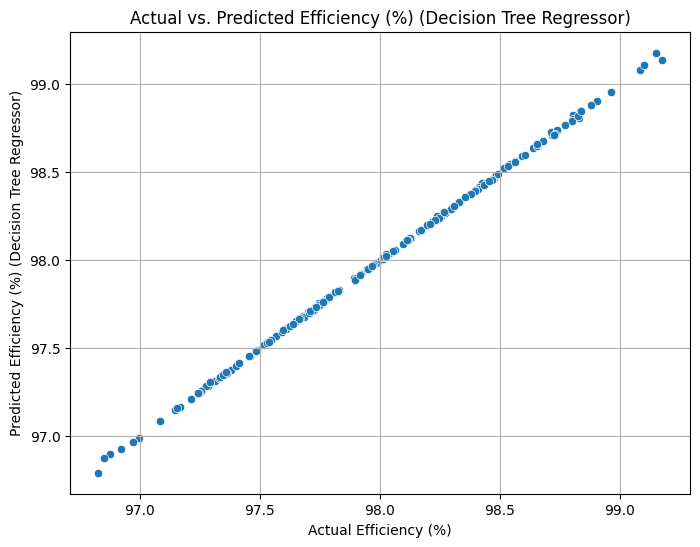

In [121]:
#visualize the output of decision tree regression model


import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Actual vs. Predicted values for Decision Tree Regressor
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_dt)
plt.xlabel("Actual Efficiency (%)")
plt.ylabel("Predicted Efficiency (%) (Decision Tree Regressor)")
plt.title("Actual vs. Predicted Efficiency (%) (Decision Tree Regressor)")
plt.grid(True)
plt.show()

In [122]:
#tabular data capturing key metrics across 4 different models


import pandas as pd

performance_data = {
    'Model': ['Linear Regression', 'SVR (Linear Kernel)', 'Ridge Regression', 'Decision Tree Regressor'],
    'Mean Squared Error (MSE)': [mse, mse_svr, mse_ridge, mse_dt],
    'R-squared (R2)': [r2, r2_svr, r2_ridge, r2_dt]
}
performance_df = pd.DataFrame(performance_data)
display(performance_df)

,Model,Mean Squared Error (MSE),R-squared (R2)
0,Linear Regression,2.372894e-28,1.000000
1,SVR (Linear Kernel),1.813669e-03,0.993011
2,Ridge Regression,8.697226e-12,1.000000
3,Decision Tree Regressor,4.658023e-05,0.999820


##Cross validation across models

In [123]:
from sklearn.model_selection import cross_val_score, KFold

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# 4 Models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('SVR (Linear Kernel)', SVR(kernel='linear')),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Decision Tree Regressor', DecisionTreeRegressor(random_state=42))
]

# Cross-validation
cv_results = {}
for name, model in models:
    # Cross-validation scores for R-squared
    r2_scores = cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='r2')
    # Cross-validation scores for MSE
    mse_scores = -cross_val_score(model, X_train_encoded, y_train, cv=kf, scoring='neg_mean_squared_error')

    cv_results[name] = {
        'Mean R-squared': r2_scores.mean(),
        'Std R-squared': r2_scores.std(),
        'Mean MSE': mse_scores.mean(),
        'Std MSE': mse_scores.std()
    }

# Cross-validation results
cv_df = pd.DataFrame(cv_results).T
display(cv_df)

,Mean R-squared,Std R-squared,Mean MSE,Std MSE
Linear Regression,1.000000,0.000000e+00,3.241272e-28,2.728551e-28
SVR (Linear Kernel),0.993025,6.662636e-04,2.044631e-03,1.556617e-04
Ridge Regression,1.000000,7.749200e-12,1.426605e-11,3.219519e-12
Decision Tree Regressor,0.999693,1.598025e-04,8.581646e-05,3.347339e-05


/tmp/ipython-input-1321493693.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_df.index, y='Mean R-squared', data=cv_df, palette='viridis')


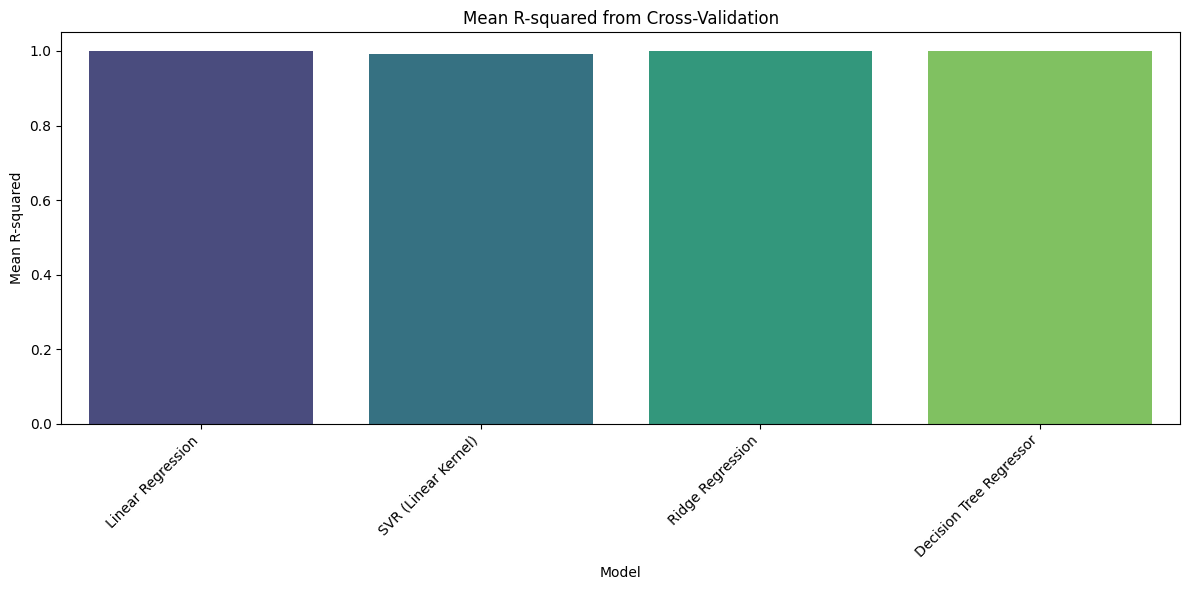

/tmp/ipython-input-1321493693.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cv_df.index, y='Mean MSE', data=cv_df, palette='magma')


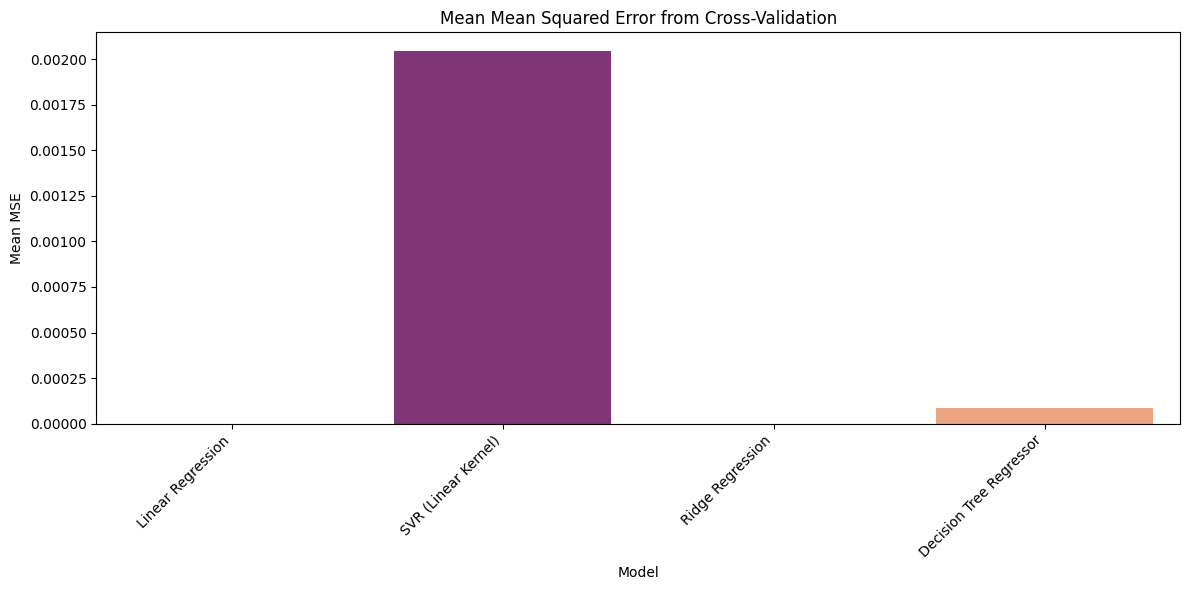

In [124]:
# plot all the cross validation output


import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Mean R-squared
plt.figure(figsize=(12, 6))
sns.barplot(x=cv_df.index, y='Mean R-squared', data=cv_df, palette='viridis')
plt.title('Mean R-squared from Cross-Validation')
plt.xlabel('Model')
plt.ylabel('Mean R-squared')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize Mean MSE
plt.figure(figsize=(12, 6))
sns.barplot(x=cv_df.index, y='Mean MSE', data=cv_df, palette='magma')
plt.title('Mean Mean Squared Error from Cross-Validation')
plt.xlabel('Model')
plt.ylabel('Mean MSE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()